In [1]:
%matplotlib inline
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.cm
from fermipy.spectrum import PLExpCutoff
from haloanalysis.model import make_prim_model, make_casc_model
import numpy as np

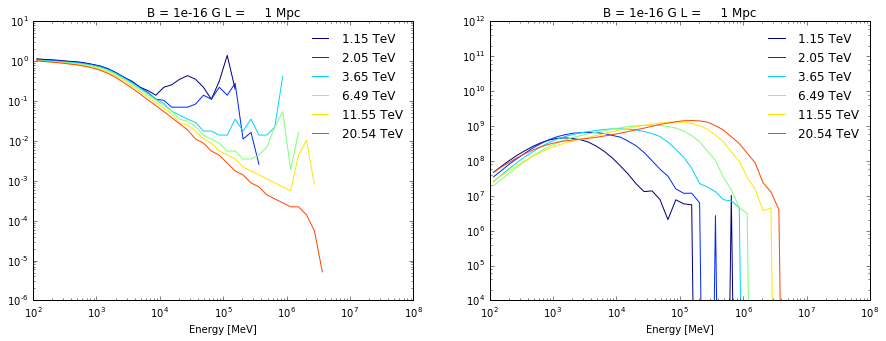

In [2]:

tab0 = Table.read('results.fits')
tab1 = Table.read('results.fits','ENERGIES')


emin = tab1['E_ledge']/1E6
emax = tab1['E_redge']/1E6
ectr = tab1['E_cen']/1E6
deltae = emax-emin
efct = ectr**2/deltae
igmf = np.array(tab0['igmf'].reshape((9,9)))
lcoh = np.array(tab0['lcoh'].reshape((9,9)))

tab_r_68 = tab0['r_68'].reshape((9,9,44,44))
tab_casc_flux = tab0['casc_flux'].reshape((9,9,44,44))
tab_prim_flux = tab0['prim_flux'].reshape((9,9,44))
tab_inj_flux = tab0['inj_flux'].reshape((9,9,44))

idx0 = 4
idx1 = 4

s = slice(32,None,2)
n = len(ectr[s])

fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
for i, (egy, r68) in enumerate(zip(ectr[s],tab_r_68[idx0,idx1,s])):
    color = float(i)/float(n)    
    plt.loglog(ectr,r68,color=matplotlib.cm.jet(color),label='%.2f TeV'%(egy/1E6))
    
plt.gca().legend(frameon=False)
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_title('B = %5.2g G L = %5.2g Mpc'%(igmf[idx0,idx1],lcoh[idx0,idx1]))

fig.add_subplot(122)
for i, (egy, flux) in enumerate(zip(ectr[s],tab_casc_flux[idx0,idx1,s])):
    color = float(i)/float(n)
    plt.loglog(ectr,flux*efct,color=matplotlib.cm.jet(color),label='%.2f TeV'%(egy/1E6))
    
plt.gca().legend(frameon=False)

plt.gca().set_ylim(1E4,1E12)
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_title('B = %5.2g G L = %5.2g Mpc'%(igmf[idx0,idx1],lcoh[idx0,idx1]))




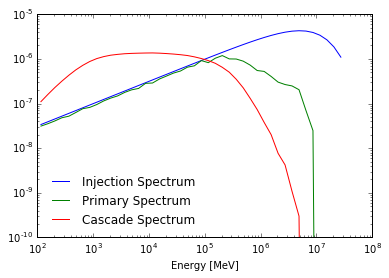

In [3]:
# Injection spectrum
inj_spec = PLExpCutoff([1E-13,-1.5,10E6],scale=1E3)

inj_flux = inj_spec.flux(emin,emax)
prim_flux = make_prim_model(inj_spec,tab_inj_flux[idx0,idx1],
                            tab_prim_flux[idx0,idx1],emin,emax)
casc_flux = make_casc_model(inj_spec,tab_inj_flux[idx0,idx1],
                            tab_casc_flux[idx0,idx1],emin,emax,0)

plt.figure()

plt.loglog(ectr,inj_flux*efct,label='Injection Spectrum')
plt.loglog(ectr,prim_flux*efct,label='Primary Spectrum')
plt.loglog(ectr,casc_flux*efct,label='Cascade Spectrum')

plt.gca().set_ylim(1E-10)
plt.gca().legend(frameon=False,loc='best')
plt.gca().set_xlabel('Energy [MeV]')


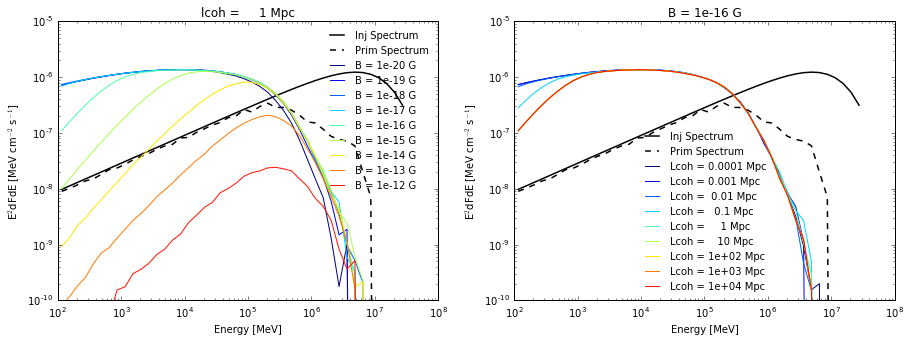

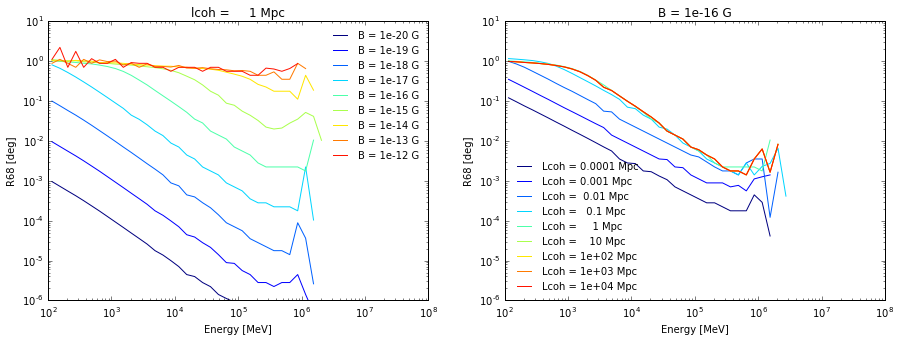

In [4]:
inj_spec = PLExpCutoff([1E-13,-1.5,10E6],scale=1E3)
casc_flux = make_casc_model(inj_spec,tab0['inj_flux'],tab0['casc_flux'],emin,emax,1)
casc_flux = casc_flux.reshape((9,9,44))
prim_flux = make_prim_model(inj_spec,tab_inj_flux[idx0,idx1],
                            tab_prim_flux[idx0,idx1],emin,emax)
inj_flux = inj_spec.flux(emin,emax)
r68 = tab_r_68[:,:,-5,:]


# Cascade Flux at Constant Lcoh
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)

plt.loglog(ectr,inj_flux*ectr,color='k',linewidth=1.5,label='Inj Spectrum')
plt.loglog(ectr,prim_flux*ectr,color='k',linewidth=1.5,linestyle='--',label='Prim Spectrum')

for i in range(9):

    plt.loglog(ectr,casc_flux[4,i]*efct,color=matplotlib.cm.jet(float(i)/9.),
               label='B = %5.2g G'%igmf[4,i])
    
plt.gca().set_ylim(1E-10)
plt.gca().set_title('lcoh = %5.2g Mpc'%lcoh[4,0])
plt.gca().legend(frameon=False,loc='best',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('E$^{2}$dFdE [MeV cm$^{-2}$ s$^{-1}$]')

# Cascade Flux at Constant Bfield
fig.add_subplot(122)

plt.loglog(ectr,inj_flux*ectr,color='k',linewidth=1.5,label='Inj Spectrum')
plt.loglog(ectr,prim_flux*ectr,color='k',linewidth=1.5,linestyle='--',label='Prim Spectrum')

for i in range(9):

    plt.loglog(ectr,casc_flux[i,4]*efct,color=matplotlib.cm.jet(float(i)/9.),
               label='Lcoh = %5.2g Mpc'%lcoh[i,4])
    
plt.gca().set_ylim(1E-10)
plt.gca().set_title('B = %5.2g G'%igmf[0,4])
plt.gca().legend(frameon=False,loc='best',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('E$^{2}$dFdE [MeV cm$^{-2}$ s$^{-1}$]')

# R68 at Constant Lcoh
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)

for i in range(9):

    plt.loglog(ectr,r68[4,i],color=matplotlib.cm.jet(float(i)/9.),
               label='B = %5.2g G'%igmf[4,i])
    
plt.gca().set_ylim(1E-6,10)
plt.gca().set_title('lcoh = %5.2g Mpc'%lcoh[4,0])
plt.gca().legend(frameon=False,loc='best',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('R68 [deg]')

# R68 at Constant Bfield
fig.add_subplot(122)
for i in range(9):

    plt.loglog(ectr,r68[i,4],color=matplotlib.cm.jet(float(i)/9.),
               label='Lcoh = %5.2g Mpc'%lcoh[i,4])
    
plt.gca().set_ylim(1E-6,10)
plt.gca().set_title('B = %5.2g G'%igmf[0,4])
plt.gca().legend(frameon=False,loc='best',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('R68 [deg]')
    